In [1]:
import os 
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
os.chdir('C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data')
os.getcwd()

'C:\\Users\\rhian\\Downloads\\CYPLAN 255\\AP-Exams\\Data'

# Gather all AP Exam data together 

In [3]:
ap11_1 = pd.read_csv('ap11_all_1.csv')
ap11_2 = pd.read_csv('ap11_all_2.csv')
ap11_3 = pd.read_csv('ap11_all_3.csv')

ap13_1 = pd.read_csv('ap13_all_1.csv')
ap13_2 = pd.read_csv('ap13_all_2.csv')

ap15_1 = pd.read_csv('ap15_all_1.csv')
ap15_15 = pd.read_csv('ap15_all_1.5.csv') 
ap15_2 = pd.read_csv('ap15_all_2.csv')
ap15_3 = pd.read_csv('ap15_all_3.csv')

ap17_1 = pd.read_csv('ap17_all_1.csv')
ap17_2 = pd.read_csv('ap17_all_2.csv')

ap_exams = pd.concat([ap11_1, ap11_2, ap11_3, 
                      ap13_1, ap13_2, 
                      ap15_1, ap15_15, ap15_2, ap15_3, 
                      ap17_1, ap17_2]).reset_index(drop=True)
ap_exams = ap_exams.drop('Unnamed: 0', axis=1)
ap_exams

C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rhian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,crdc_id,ncessch,year,fips,leaid,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
0,10000201705,10000201705.0,2011,1,100002.0,1,1,NaN,NaN,NaN,NaN
1,10000201705,10000201705.0,2011,1,100002.0,2,1,NaN,NaN,NaN,NaN
2,10000201705,10000201705.0,2011,1,100002.0,3,1,NaN,NaN,NaN,NaN
3,10000201705,10000201705.0,2011,1,100002.0,4,1,NaN,NaN,NaN,NaN
4,10000201705,10000201705.0,2011,1,100002.0,5,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9243211,720003002085,720003002085.0,2017,72,7200030.0,4,99,0.0,NaN,0.0,NaN
9243212,720003002085,720003002085.0,2017,72,7200030.0,5,99,0.0,NaN,0.0,NaN
9243213,720003002085,720003002085.0,2017,72,7200030.0,6,99,0.0,NaN,0.0,NaN
9243214,720003002085,720003002085.0,2017,72,7200030.0,7,99,0.0,NaN,0.0,NaN


In [4]:
ap_exams.to_csv('AP_Exams_all.csv')

# All AP Exam EDA 

In [13]:
ap_exams.describe()

,year,fips,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
count,9.243216e+06,9.243216e+06,9.243216e+06,9.243216e+06,1.277531e+06,268825.000000,1.277541e+06,252736.000000
mean,2.014018e+03,2.848672e+01,1.587500e+01,3.400000e+01,8.007054e+00,31.845729,2.475486e+01,49.640455
std,2.239247e+00,1.610812e+01,3.147395e+01,4.596376e+01,2.900707e+01,48.135102,7.328134e+01,83.259691
min,2.011000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.013000e+03,1.300000e+01,2.750000e+00,1.000000e+00,0.000000e+00,7.000000,0.000000e+00,7.000000
50%,2.015000e+03,2.900000e+01,4.500000e+00,2.000000e+00,0.000000e+00,15.000000,1.000000e+00,19.000000
75%,2.017000e+03,4.200000e+01,6.250000e+00,9.900000e+01,2.000000e+00,37.000000,1.200000e+01,55.000000
max,2.017000e+03,7.200000e+01,9.900000e+01,9.900000e+01,1.673000e+03,1682.000000,3.737000e+03,2183.000000


In [15]:
ap_exams.nunique()

crdc_id                       159127
ncessch                       116770
year                               4
fips                              52
leaid                          18856
race                               8
sex                                3
students_AP_exam_none            726
students_AP_pass_none            618
students_AP_exam_oneormore      1288
students_AP_pass_oneormore       940
dtype: int64

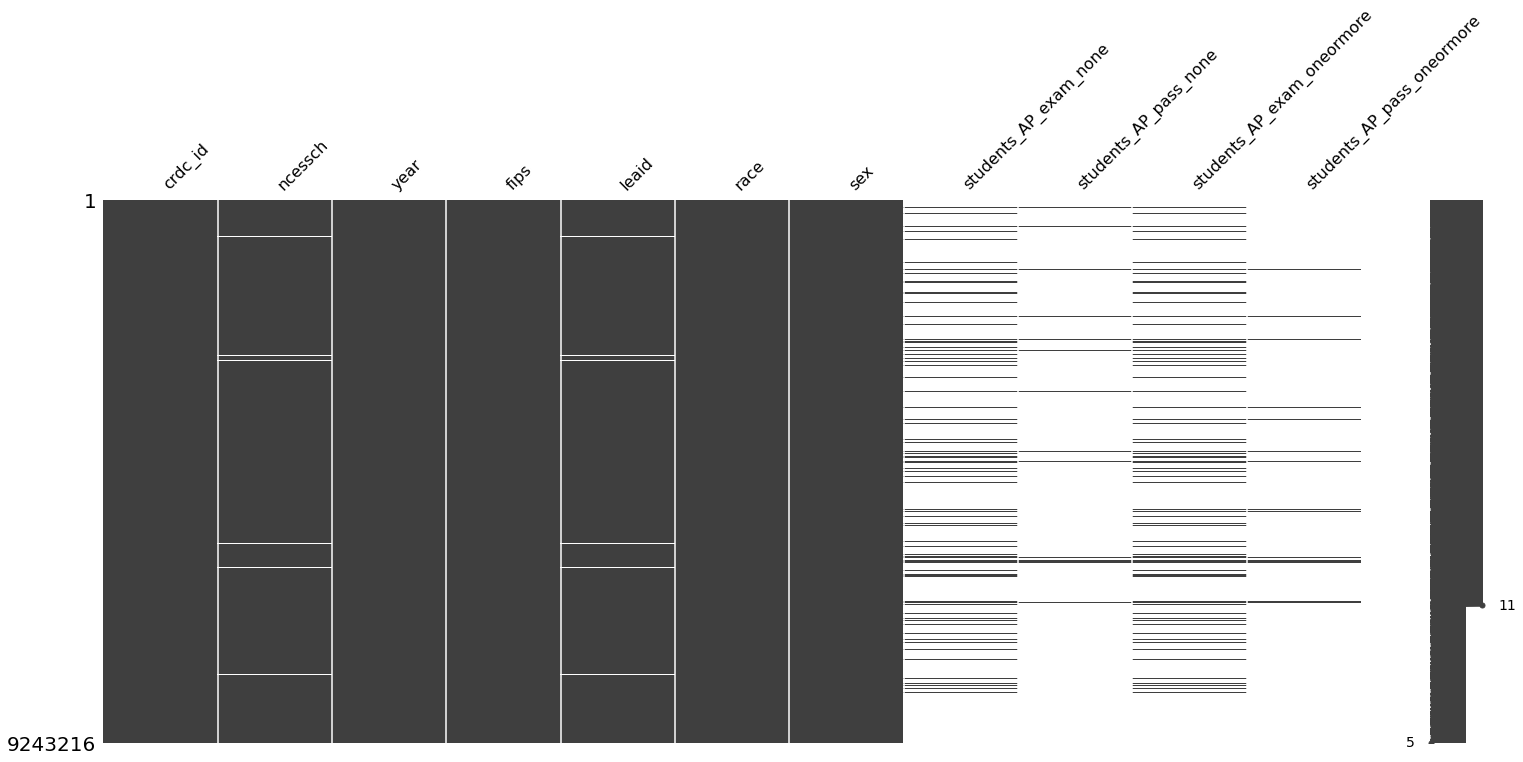

In [18]:
msno.matrix(ap_exams);

# California EDA 

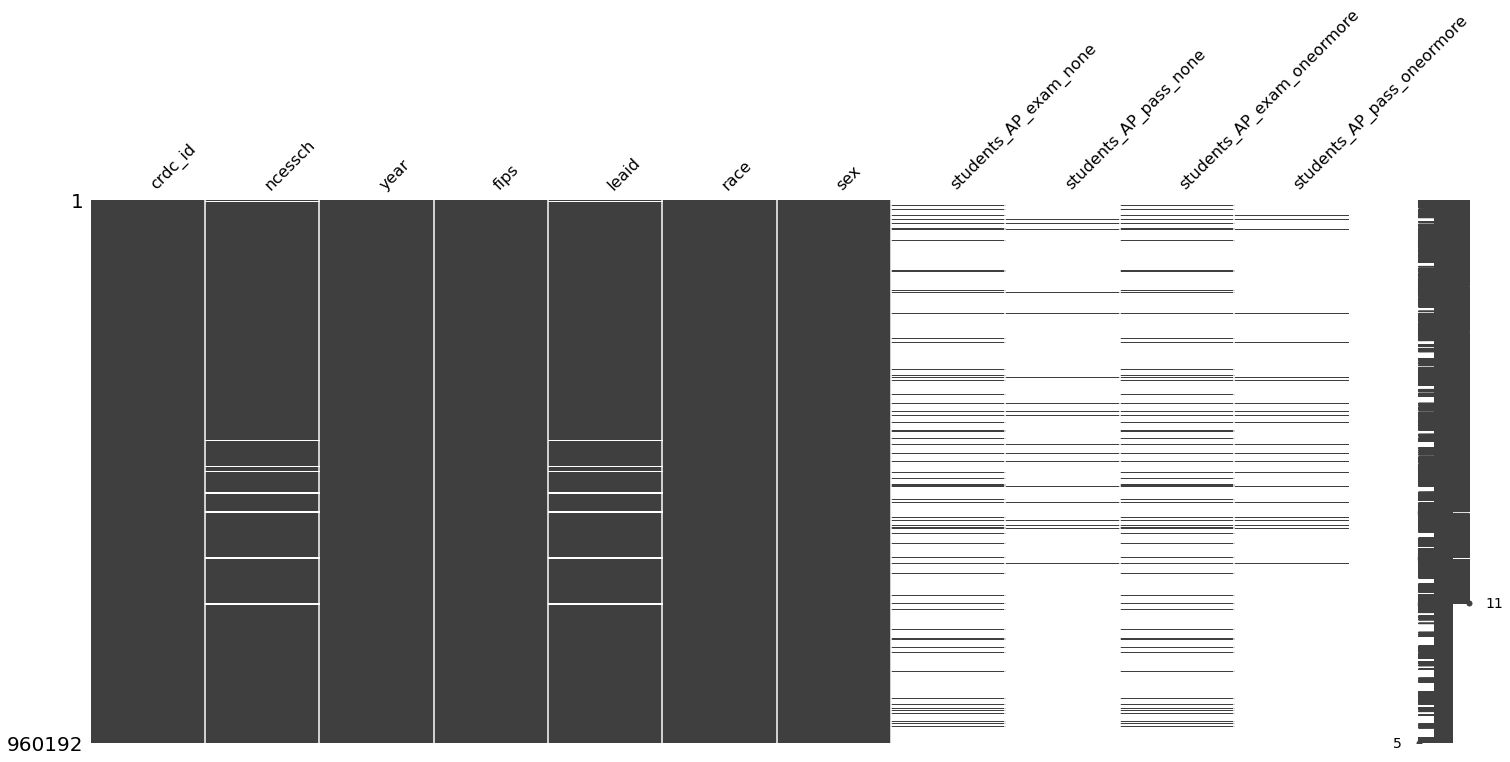

In [5]:
ap_cali = ap_exams[(ap_exams['fips'] == 6)]
msno.matrix(ap_cali);

In [6]:
ap_cali.to_csv('AP_Exams_Cali.csv', index=False)

In [20]:
ap_cali.describe()

,year,fips,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
count,960192.000000,960192.0,960192.000000,960192.000000,118664.000000,33681.000000,118680.000000,33252.000000
mean,2014.025495,6.0,15.875000,34.000000,13.141543,36.947715,40.443343,61.762150
std,2.235164,0.0,31.473964,45.963778,37.912097,49.487347,95.943129,95.164694
min,2011.000000,6.0,1.000000,1.000000,0.000000,4.000000,0.000000,1.000000
25%,2013.000000,6.0,2.750000,1.000000,0.000000,7.000000,0.000000,10.000000
50%,2015.000000,6.0,4.500000,2.000000,1.000000,19.000000,2.000000,26.000000
75%,2017.000000,6.0,6.250000,99.000000,8.000000,46.000000,31.000000,71.000000
max,2017.000000,6.0,99.000000,99.000000,1381.000000,809.000000,1565.000000,1274.000000


In [21]:
ap_cali.nunique()

crdc_id                       15672
ncessch                       17349
year                              4
fips                              1
leaid                          1741
race                              8
sex                               3
students_AP_exam_none           494
students_AP_pass_none           382
students_AP_exam_oneormore      912
students_AP_pass_oneormore      658
dtype: int64

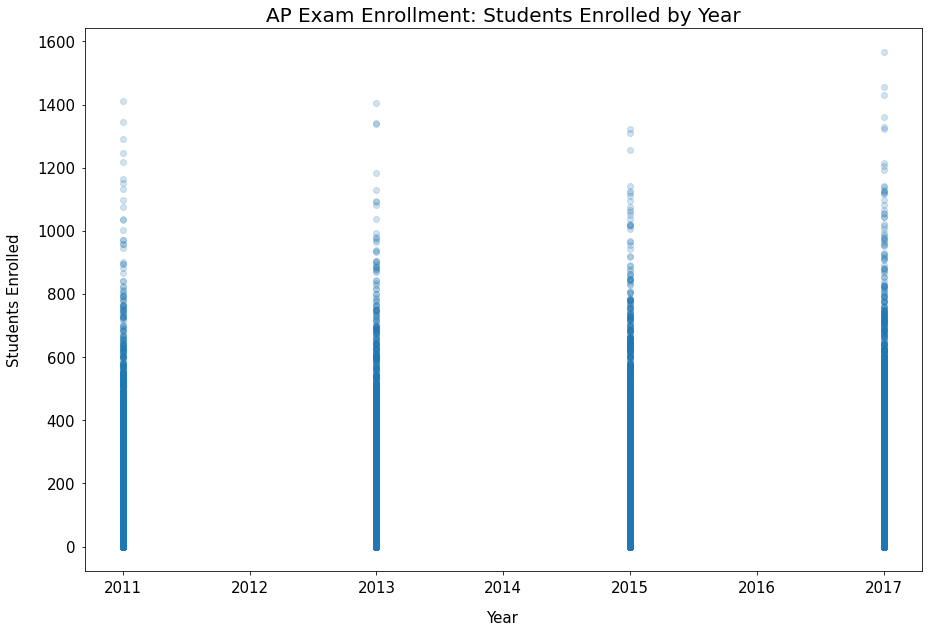

In [45]:
fig, ax = plt.subplots(figsize=(15,10)) 
plt.scatter(ap_cali['year'], ap_cali['students_AP_exam_oneormore'], alpha=0.2)
# fig.suptitle('test title', fontsize=20)
ax.set_title('AP Exam Enrollment: Students Enrolled by Year',fontsize= 20)
plt.xlabel("Year", fontsize=15, labelpad=15)
plt.ylabel("Students Enrolled", fontsize=15, labelpad=15)
plt.tick_params(labelsize=15, pad=6); 

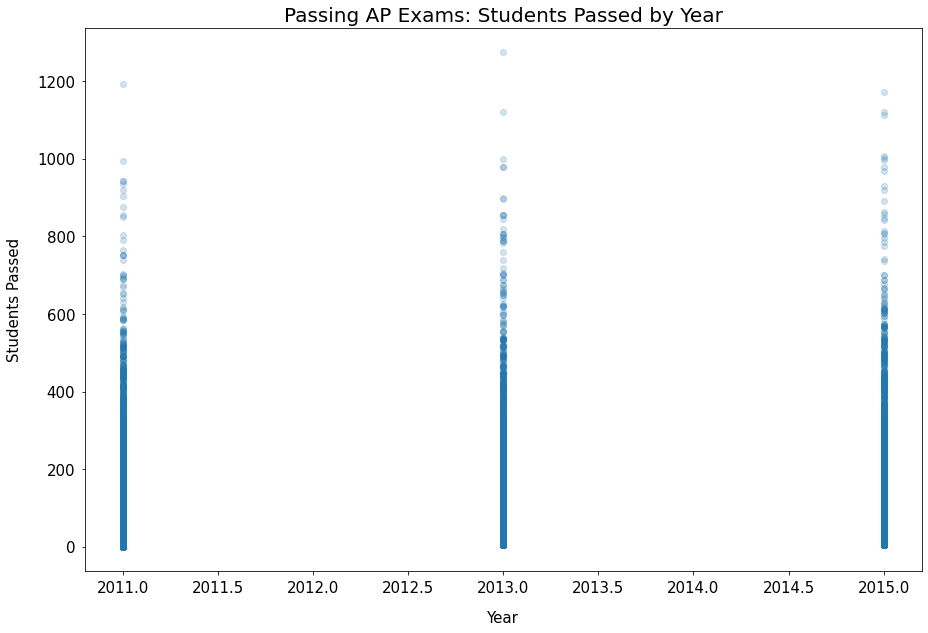

In [43]:
fig, ax = plt.subplots(figsize=(15,10)) 
plt.scatter(ap_cali['year'], ap_cali['students_AP_pass_oneormore'], alpha=0.2)
# fig.suptitle('test title', fontsize=20)
ax.set_title('Passing AP Exams: Students Passed by Year',fontsize= 20)
plt.xlabel("Year", fontsize=15, labelpad=15)
plt.ylabel("Students Passed", fontsize=15, labelpad=15)
plt.tick_params(labelsize=15, pad=6); 

In [51]:
# Change the race column values to be more easily interpretable 
race_dict = {1 : 'White', 2 : 'Black', 3: 'Hispanic', 4 : 'Asian', 
             5: 'Indigenous \nAmerican ', 
             6: "Pacific \nIslander", 
             7 : "Multiracial", 8 : "Nonresident alien", 9 : "Unknown", 
             20 : "Other", 99 : "Total"}
ap_cali = ap_cali.replace({"race": race_dict})

## AP Exams Averages

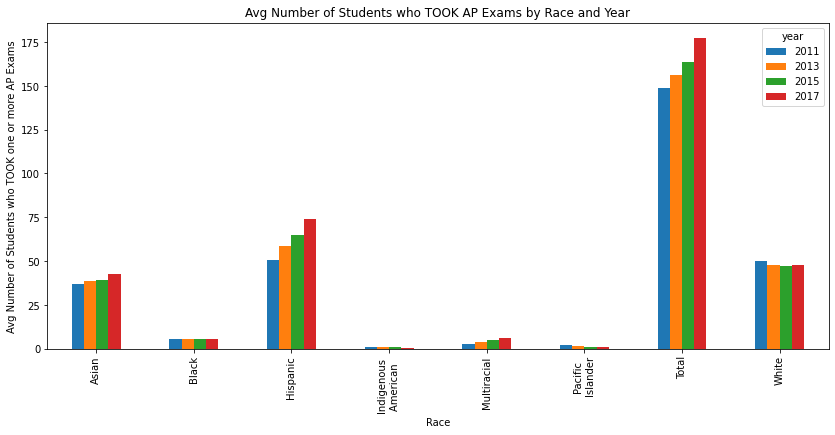

In [58]:
ap_cali.groupby(['race', 'year'])['students_AP_exam_oneormore'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who TOOK AP Exams by Race and Year', 
    ylabel='Avg Number of Students who TOOK one or more AP Exams', xlabel='Race');

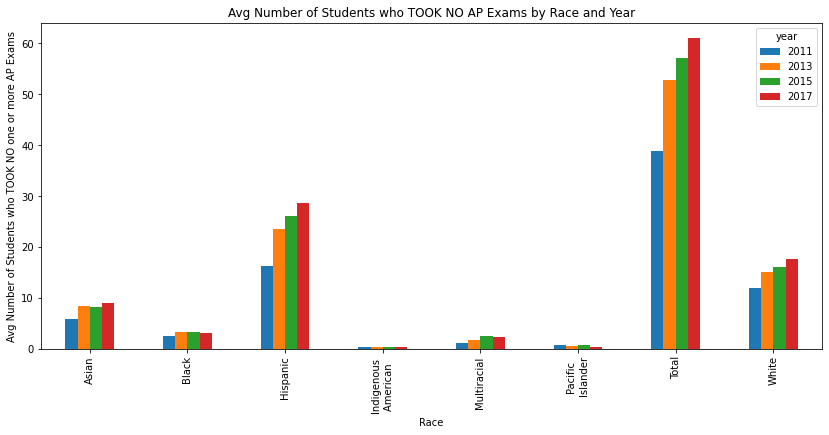

In [59]:
ap_cali.groupby(['race', 'year'])['students_AP_exam_none'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who TOOK NO AP Exams by Race and Year', 
    ylabel='Avg Number of Students who TOOK NO one or more AP Exams', xlabel='Race');

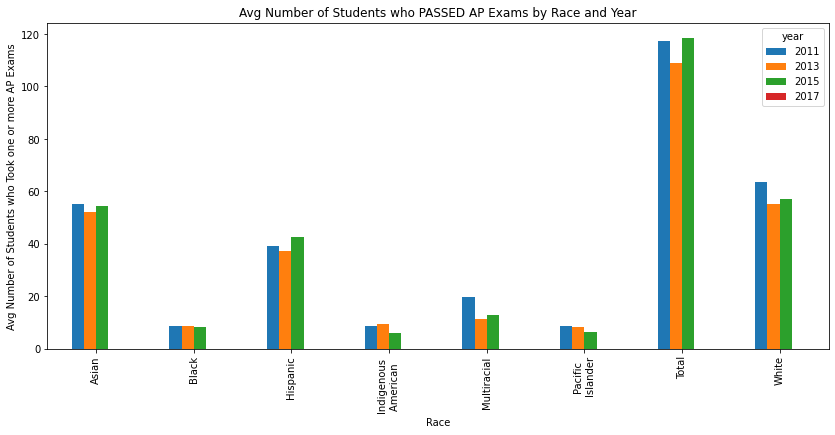

In [57]:
ap_cali.groupby(['race', 'year'])['students_AP_pass_oneormore'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who PASSED AP Exams by Race and Year', 
    ylabel='Avg Number of Students who PASSED one or more AP Exams', xlabel='Race');

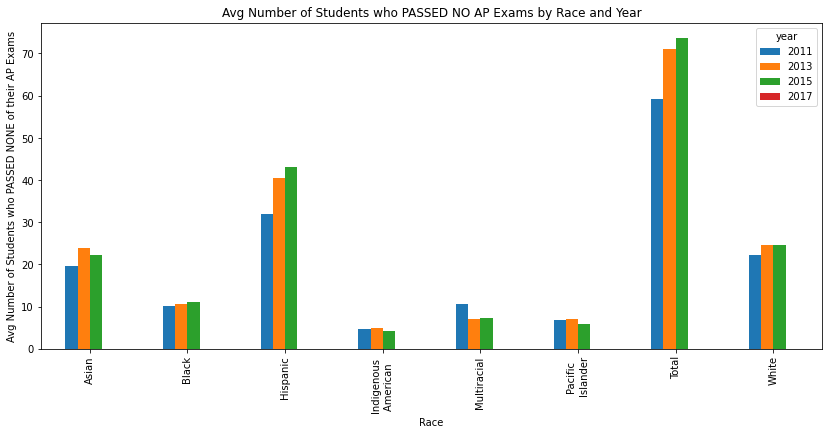

In [60]:
ap_cali.groupby(['race', 'year'])['students_AP_pass_none'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who PASSED NO AP Exams by Race and Year', 
    ylabel='Avg Number of Students who PASSED NONE of their AP Exams', xlabel='Race');

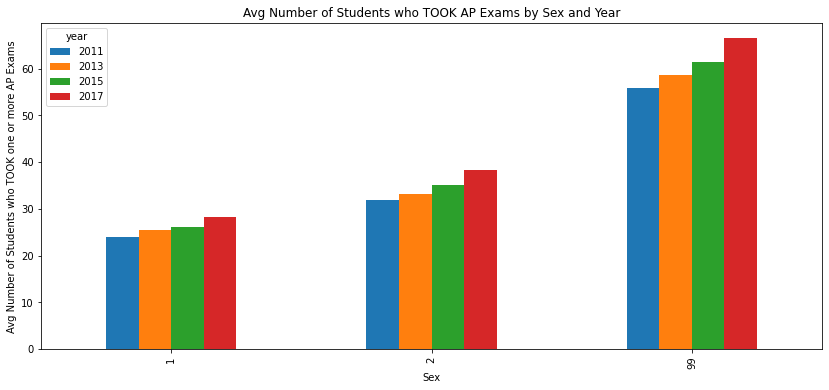

In [69]:
ap_cali.groupby(['sex', 'year'])['students_AP_exam_oneormore'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who TOOK AP Exams by Sex and Year', 
    ylabel='Avg Number of Students who TOOK one or more AP Exams', xlabel='Sex');

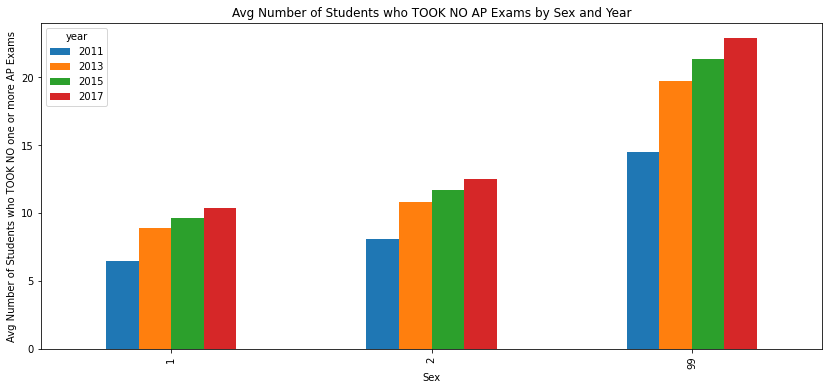

In [70]:
ap_cali.groupby(['sex', 'year'])['students_AP_exam_none'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who TOOK NO AP Exams by Sex and Year', 
    ylabel='Avg Number of Students who TOOK NO one or more AP Exams', xlabel='Sex');

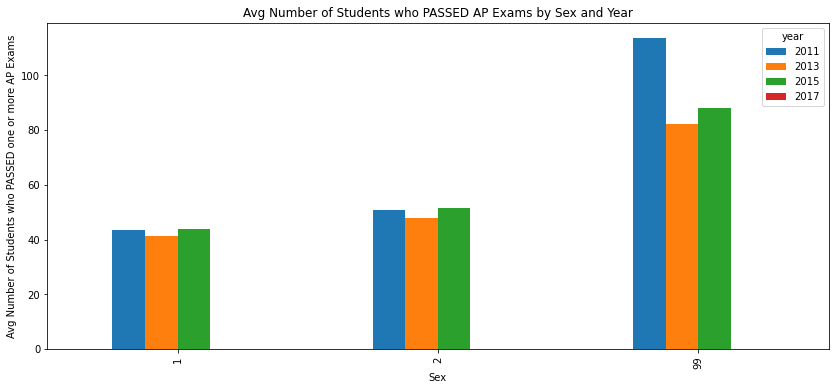

In [71]:
ap_cali.groupby(['sex', 'year'])['students_AP_pass_oneormore'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who PASSED AP Exams by Sex and Year', 
    ylabel='Avg Number of Students who PASSED one or more AP Exams', xlabel='Sex');

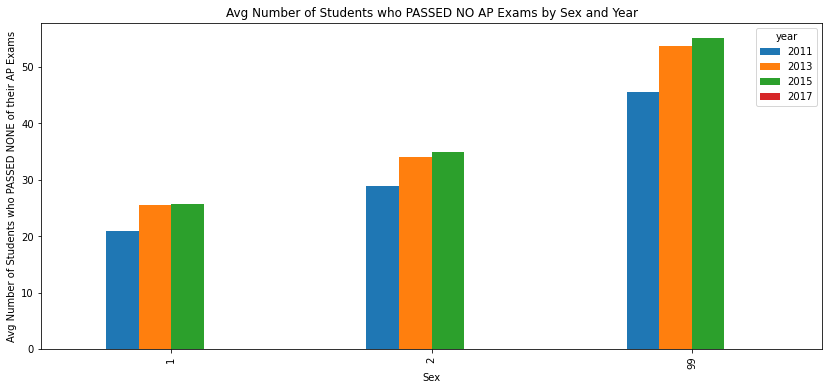

In [72]:
ap_cali.groupby(['sex', 'year'])['students_AP_pass_none'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who PASSED NO AP Exams by Sex and Year', 
    ylabel='Avg Number of Students who PASSED NONE of their AP Exams', xlabel='Sex');

## Analyzing Available Data 

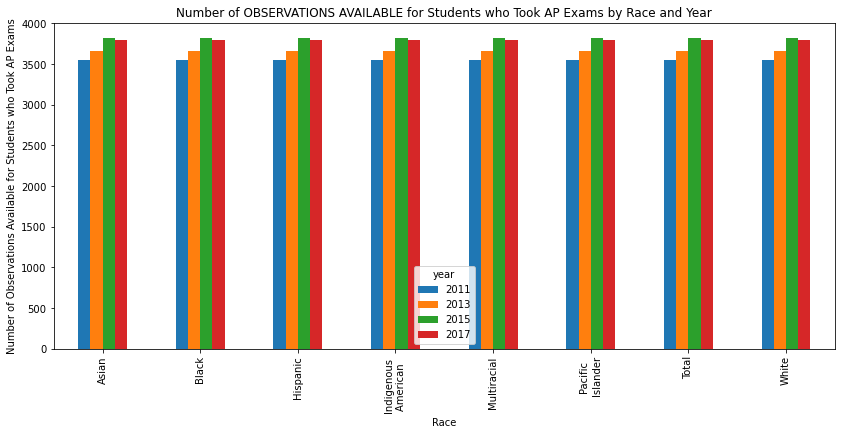

In [77]:
ap_cali.groupby(['race', 'year'])['students_AP_exam_oneormore'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Number of OBSERVATIONS AVAILABLE for Students who Took AP Exams by Race and Year', 
    ylabel='Number of Observations Available for Students who Took AP Exams', xlabel='Race');

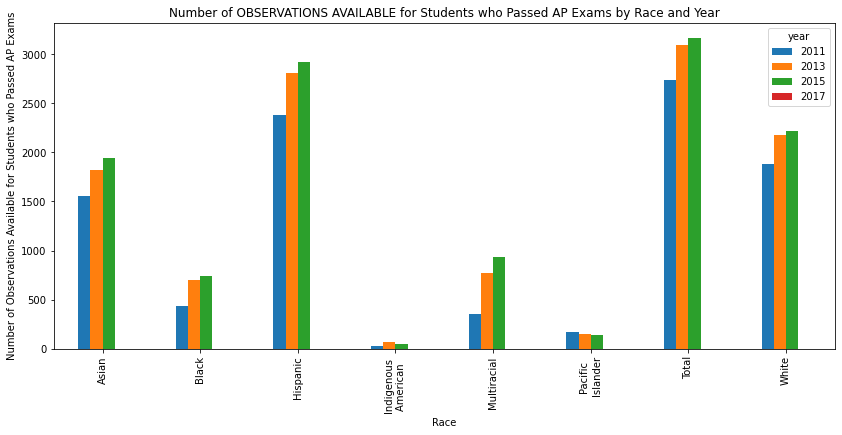

In [78]:
ap_cali.groupby(['race', 'year'])['students_AP_pass_oneormore'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Number of OBSERVATIONS AVAILABLE for Students who Passed AP Exams by Race and Year', 
    ylabel='Number of Observations Available for Students who Passed AP Exams', xlabel='Race');

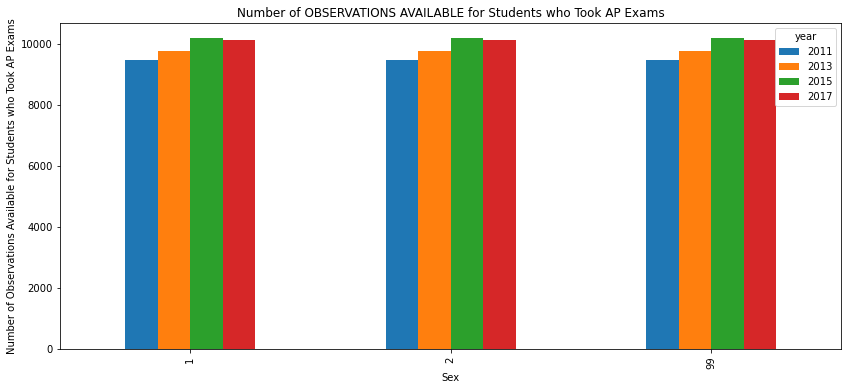

In [79]:
ap_cali.groupby(['sex', 'year'])['students_AP_exam_oneormore'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Number of OBSERVATIONS AVAILABLE for Students who Took AP Exams', 
    ylabel='Number of Observations Available for Students who Took AP Exams', xlabel='Sex');

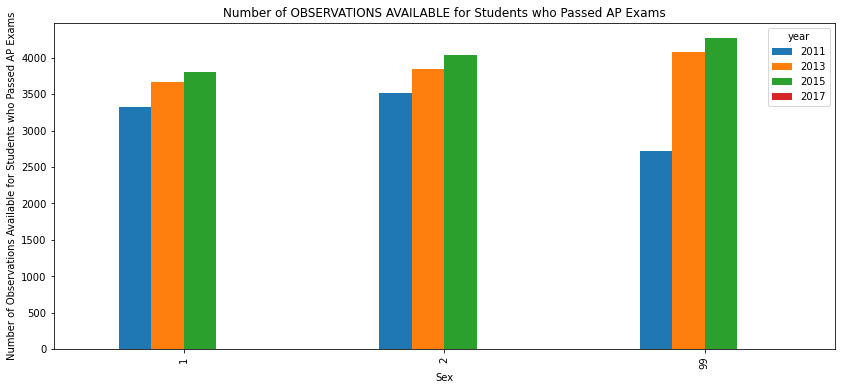

In [80]:
ap_cali.groupby(['sex', 'year'])['students_AP_pass_oneormore'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Number of OBSERVATIONS AVAILABLE for Students who Passed AP Exams', 
    ylabel='Number of Observations Available for Students who Passed AP Exams', xlabel='Sex');

## Boxplots! 

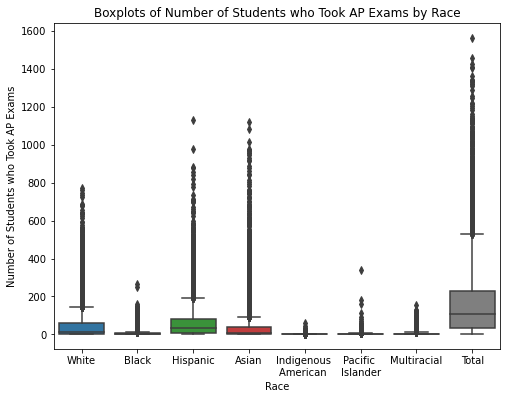

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=ap_cali, x='race', y='students_AP_exam_oneormore').set(
    xlabel='Race', 
    ylabel='Number of Students who Took AP Exams',
    title='Boxplots of Number of Students who Took AP Exams by Race'); 

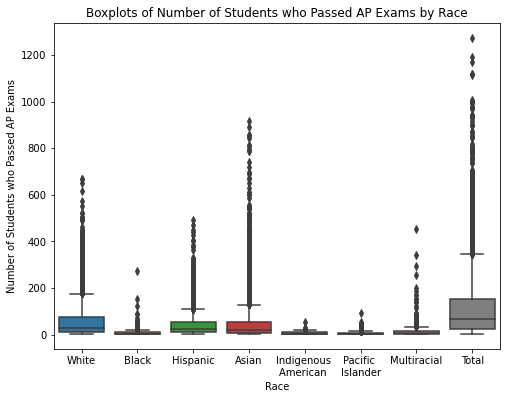

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=ap_cali, x='race', y='students_AP_pass_oneormore').set(
    xlabel='Race', 
    ylabel='Number of Students who Passed AP Exams',
    title='Boxplots of Number of Students who Passed AP Exams by Race'); 

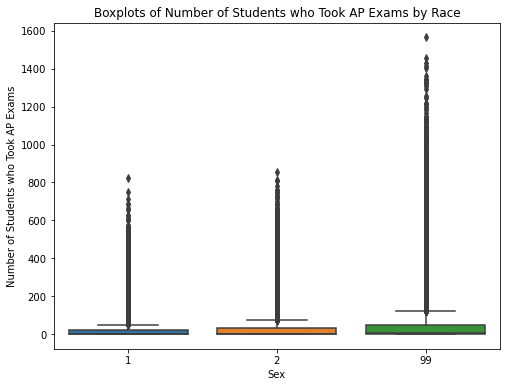

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=ap_cali, x='sex', y='students_AP_exam_oneormore').set(
    xlabel='Sex', 
    ylabel='Number of Students who Took AP Exams',
    title='Boxplots of Number of Students who Took AP Exams by Race'); 

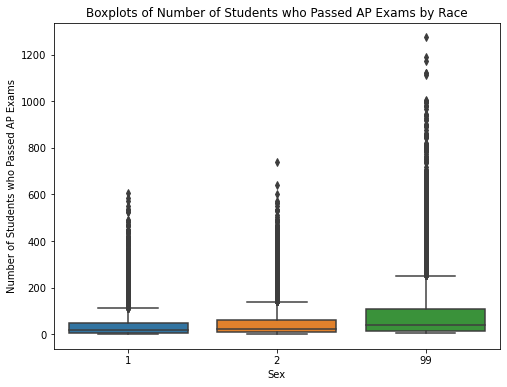

In [91]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=ap_cali, x='sex', y='students_AP_pass_oneormore').set(
    xlabel='Sex', 
    ylabel='Number of Students who Passed AP Exams',
    title='Boxplots of Number of Students who Passed AP Exams by Race'); 